read data

In [55]:
import pandas as pd
from pathlib import Path
import os

directory = Path(os.getcwd())   # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\HKUST-x-J.P.-Morgan-Fintech-Mentorship-Program\\model_testing\\supervised'
directory = directory.parent.parent.joinpath("data")  # 'c:\\Users\\samue\\OneDrive\\Desktop\\JPM Fintech\\data'
df = pd.read_pickle(directory.joinpath("stocktwits_processed_sample.pkl"))
df

,text,time,symbols,tokens
0,it's so easy to see insiders buying before th...,1639643526,$GOEV,easy see insiders buying big announcement
1,it's so easy to see insiders buying before th...,1639643526,$AAPL,easy see insiders buying big announcement
2,Santa's rally has an address to visit : “1...,1639643425,$QQQ,santas rally address visit “17000 ndx breakout...
3,Santa's rally has an address to visit : “1...,1639643425,$AAPL,santas rally address visit “17000 ndx breakout...
4,Santa's rally has an address to visit : “1...,1639643425,$SPY,santas rally address visit “17000 ndx breakout...
...,...,...,...,...
76591,suggested for US ARCA Major Markets - val...,1640145541,$XMI,suggested us arca major markets value screen
76592,and similar charts. We will see $180,1640143905,$SQ,similar charts see 180
76593,and similar charts. We will see $180,1640143905,$V,similar charts see 180
76594,damn putting in some work last couple of weeks..,1640139998,$V,damn putting work last couple weeks


Stocks distribution

In [41]:
df['symbols'].value_counts()

$TSLA    20791
$AAPL     9564
$FB       5976
$PYPL     5240
$MSFT     4940
         ...  
$EQB         1
$AZEK        1
$RPM         1
$CAG         1
$RACE        1
Name: symbols, Length: 1329, dtype: int64

In [42]:
# remove value counts only have less or equal four
df = df.groupby('symbols').filter(lambda x : len(x)>100)
df['symbols'].value_counts()

$TSLA     20791
$AAPL      9564
$FB        5976
$PYPL      5240
$MSFT      4940
$SPY       2969
$BAC       1406
$JPM       1363
$JD        1253
$V         1218
$QQQ       1135
$AMZN      1047
$NVDA       868
$MS         750
$BABA       738
$GS         712
$NIO        641
$AMD        545
$LCID       472
$KO         416
$RIVN       387
$BTC        379
$GOOG       367
$TWTR       346
$DWAC       329
$AMC        320
$SQ         316
$GOOGL      274
$AABB       265
$F          261
$DIS        209
$KWEB       206
$GME        193
$SOFI       190
$MA         176
$BA         170
$SNAP       151
$ROKU       143
$AFRM       142
$C          141
$GM         141
$BIDU       135
$XPEV       134
$PLTR       133
$ETH        123
$WFC        119
$CFVI       114
$MRNA       113
$PDD        113
$XLF        111
$DIDI       110
$GGPI       108
$PFE        104
$UPST       102
$IWM        102
Name: symbols, dtype: int64

<AxesSubplot:>

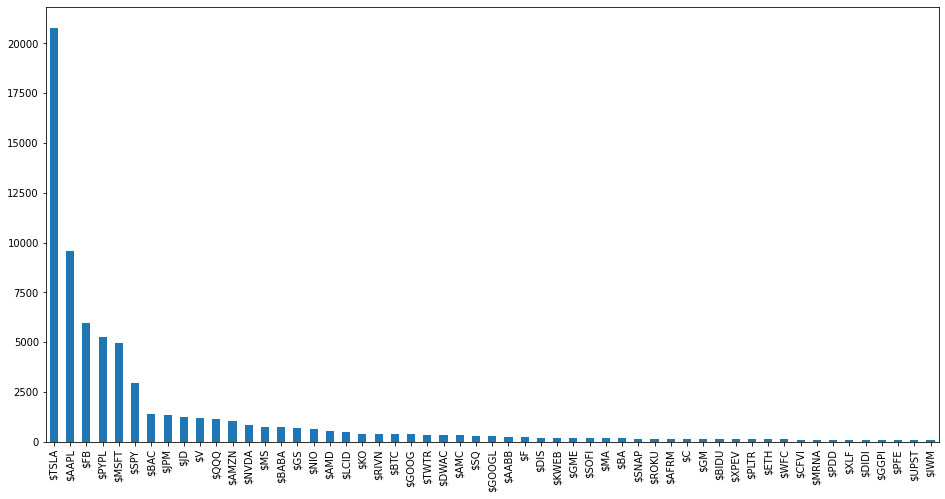

In [7]:
df['symbols'].value_counts().plot(kind='bar', figsize=(16, 8), fontsize=10)


WordCloud Generation

In [136]:
### compare different stocks
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

'''
given the column of adataframe, display the word cloud
'''
def show_wordcloud(column):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    for val in column:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()


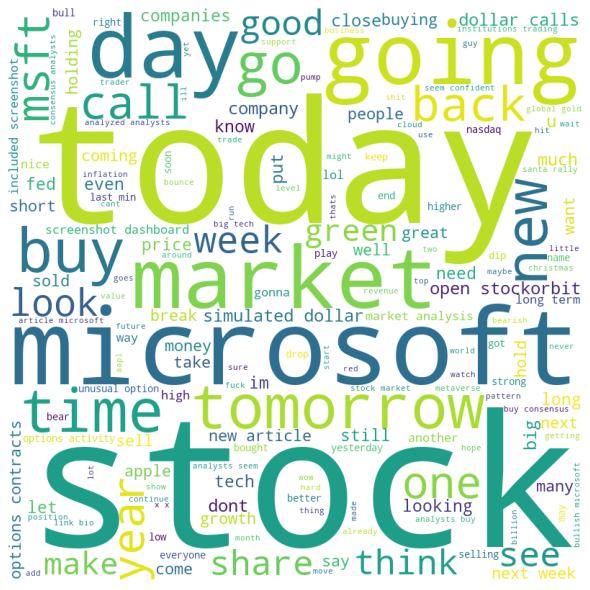

In [137]:
# MSFT
show_wordcloud(df[df['symbols']=="$MSFT"]['tokens'])

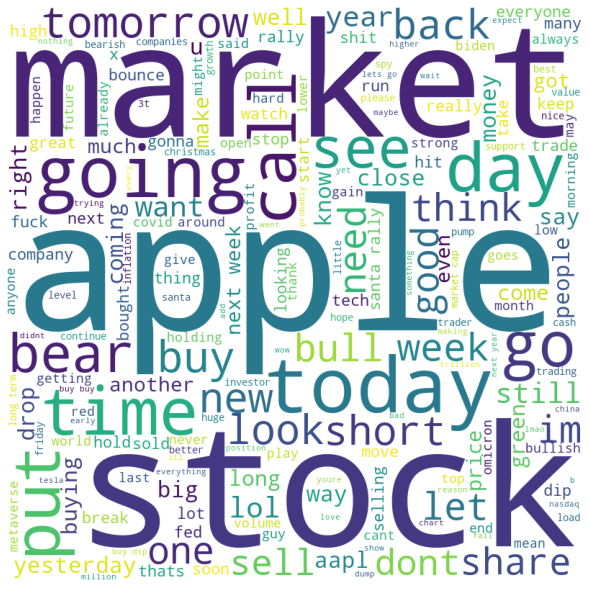

In [138]:
# AAPL
show_wordcloud(df[df['symbols']=="$AAPL"]['tokens'])

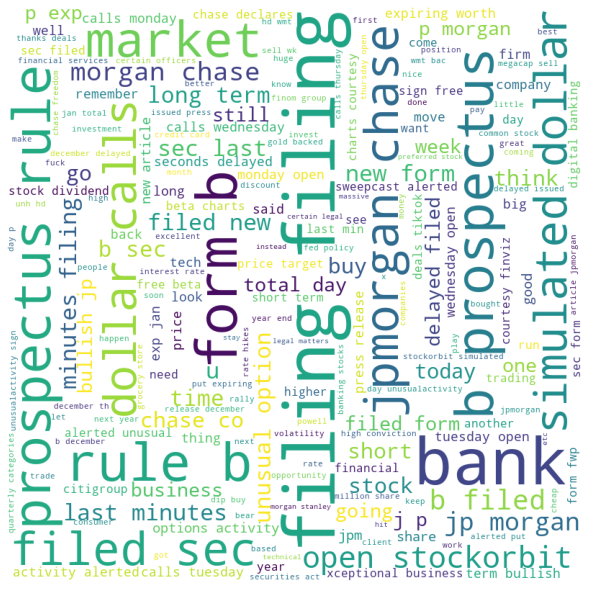

In [131]:
# AAPL
show_wordcloud(df[df['symbols']=="$JPM"]['tokens'])

from wordcloud: too many common words

Digging deep to tf-idf (+stopwords?)

In [56]:
# creating the document of MSFT
MSFT_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$MSFT'].text)])
MSFT_corpus = MSFT_corpus.replace('\n','')
MSFT_corpus[:100]

'Do we have luck this time ? Got rejected multiple times in past. RSI is also hot. The Santa Rally is'

In [57]:
# creating the document of AAPL
AAPL_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$AAPL'].text)])
AAPL_corpus = AAPL_corpus.replace('\n','')
AAPL_corpus[:100]

"it's so easy to see insiders buying before the BIG ANNOUNCEMENT. Santa's rally has an address to vis"

In [58]:
# creating the document of FB
FB_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$FB'].text)])
FB_corpus = FB_corpus.replace('\n','')
FB_corpus[:100]

'Do we have luck this time ? Got rejected multiple times in past. RSI is also hot. Imagine a world wh'

In [59]:
# creating the document of JPM
JPM_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$JPM'].text)])
JPM_corpus = JPM_corpus.replace('\n','')
JPM_corpus[:100]

"75+ on easing apple restrictions. Well i don't think i'd be selling 4 months before a hike comes, th"

In [60]:
corpus = [MSFT_corpus, AAPL_corpus, JPM_corpus, FB_corpus]

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
# words to vector
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus) # fit corpus
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
# a dataframe with tf-idf scores
df_tfidf = pd.DataFrame(lst1, columns=feature_names)
data = df_tfidf.transpose()
data.columns = ['MSFT', 'AAPL', 'JPM', 'FB']
data.head()

C:\Users\samue\anaconda3\envs\jpm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,MSFT,AAPL,JPM,FB
00,0.026696,0.021320,0.026769,0.029387
000,0.017991,0.020683,0.034265,0.021197
000000,0.000000,0.000610,0.000000,0.000000
0000000,0.000000,0.000000,0.000000,0.000923
0000019617,0.000000,0.000000,0.008208,0.000000


In [16]:
from wordcloud import WordCloud, STOPWORDS
def wordcloud_tfidf(ind):
    # sort values and only store top 100 
    df = data.sort_values(by=[ind], ascending=False)
    df = df.iloc[:100]
    print(df.iloc[:20])
    # generate wordcloud
    wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate_from_frequencies(df[ind])
    # set the figsize
    plt.figure(figsize=[12,6])
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    # remove plot axes
    plt.axis("off")

In [17]:
wordcloud_tfidf("AAPL")

              MSFT      AAPL       JPM        FB
market    0.290177  0.295929  0.114573  0.199931
apple     0.041205  0.237061  0.007495  0.039986
buy       0.175267  0.208741  0.120998  0.145492
today     0.167142  0.192831  0.065317  0.160908
just      0.133481  0.186149  0.073884  0.159463
like      0.174686  0.178830  0.058893  0.177770
day       0.151472  0.178512  0.110290  0.141156
going     0.130579  0.159101  0.047114  0.115141
calls     0.188034  0.157192  0.110290  0.163799
time      0.120713  0.133645  0.069600  0.090089
week      0.131740  0.130145  0.034265  0.096352
stocks    0.185133  0.122826  0.081379  0.119477
stock     0.169463  0.121554  0.072813  0.178733
tomorrow  0.110847  0.112962  0.025699  0.076118
good      0.089955  0.110735  0.028911  0.088162
don       0.059776  0.109144  0.013920  0.051548
rally     0.071383  0.103416  0.020345  0.044804
short     0.074285  0.101507  0.088874  0.051067
puts      0.058035  0.094188  0.004283  0.091053
new       0.113749  

NameError: name 'plt' is not defined

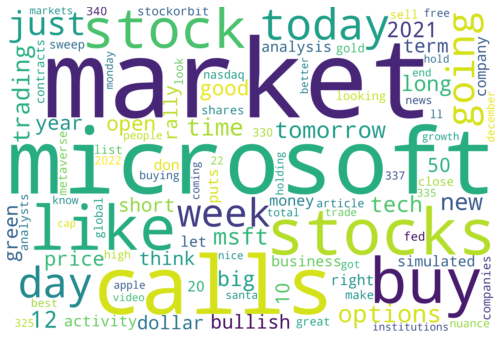

In [60]:
wordcloud_tfidf("MSFT")

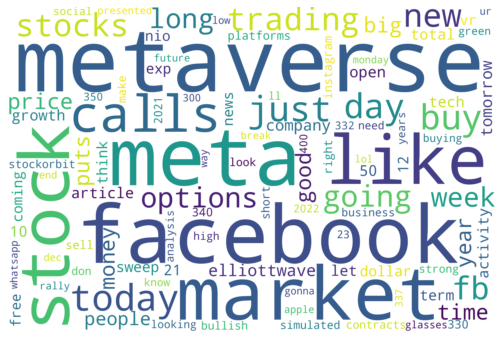

In [61]:
wordcloud_tfidf("FB")

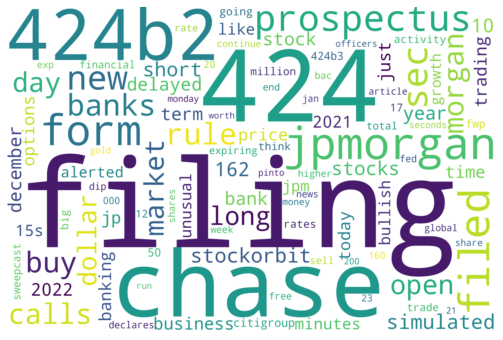

In [62]:
wordcloud_tfidf("JPM")

show word frequencies

In [159]:
from collections import Counter
from nltk import ngrams

counted = Counter(corpus)
counted_2= Counter(ngrams(corpus, 2))

word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)

In [160]:
word_freq

,word,frequency
13,market,486
54,microsoft,365
1142,calls,323
223,stocks,320
194,like,301
...,...,...
5018,chewy,1
5019,staffing,1
5020,hundreds,1
5022,dodge,1


<AxesSubplot:xlabel='frequency', ylabel='pairs'>

C:\Users\samue\anaconda3\envs\jpm\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10687 (\N{CIRCLED BULLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\samue\anaconda3\envs\jpm\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


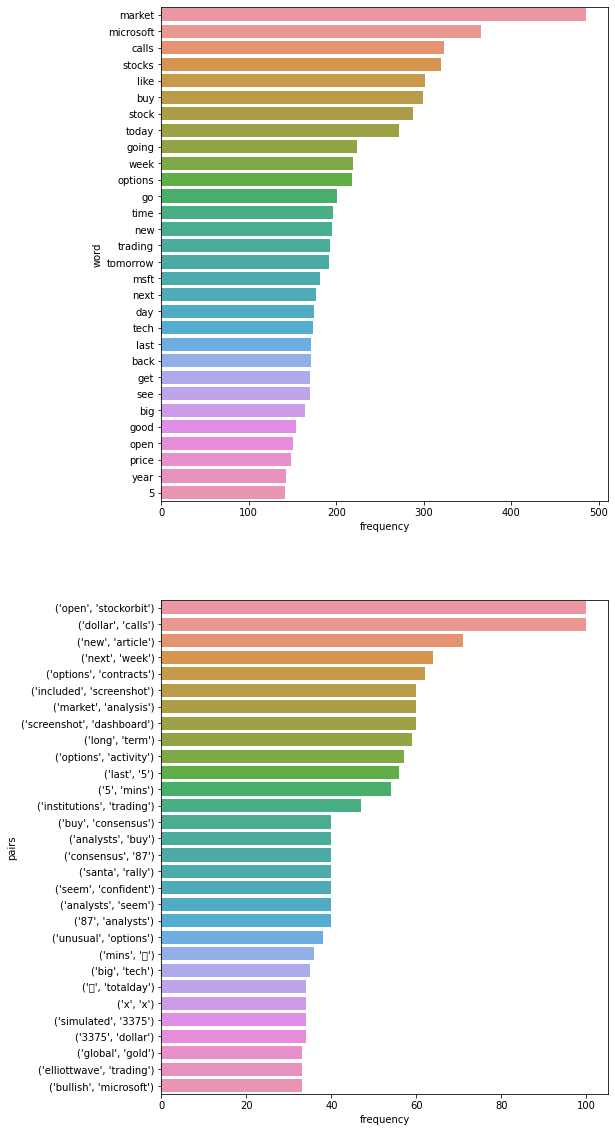

In [161]:
import seaborn as sns
# create subplot of the different data frames
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))

print out unique words of tf-idf

In [34]:
MSFT_lst = list(data.sort_values(by=['MSFT'], ascending=False).iloc[:100].index)
AAPL_lst = list(data.sort_values(by=['AAPL'], ascending=False).iloc[:100].index)
FB_lst = list(data.sort_values(by=['FB'], ascending=False).iloc[:100].index)
JPM_lst = list(data.sort_values(by=['JPM'], ascending=False).iloc[:100].index)


In [35]:
set(MSFT_lst) - set(MSFT_lst).intersection(set(AAPL_lst)) - set(MSFT_lst).intersection(set(FB_lst)) - set(MSFT_lst).intersection(set(JPM_lst))

{'22',
 '325',
 '335',
 'analysts',
 'best',
 'better',
 'cap',
 'companies',
 'institutions',
 'list',
 'microsoft',
 'msft',
 'nasdaq',
 'nice',
 'nuance',
 'video'}

In [36]:
set(AAPL_lst) - set(AAPL_lst).intersection(set(MSFT_lst)) - set(AAPL_lst).intersection(set(FB_lst)) - set(AAPL_lst).intersection(set(JPM_lst))

{'170',
 '172',
 '173',
 '175',
 '180',
 '200',
 'aapl',
 'bear',
 'bears',
 'biden',
 'bought',
 'bounce',
 'bulls',
 'christmas',
 'come',
 'drop',
 'omicron',
 'really',
 'red',
 'say',
 'selling',
 'shit',
 'soon',
 'volume',
 'want',
 'watch',
 'yesterday'}

In [37]:
set(FB_lst) - set(FB_lst).intersection(set(MSFT_lst)) - set(FB_lst).intersection(set(AAPL_lst)) - set(FB_lst).intersection(set(JPM_lst))

{'300',
 '332',
 '350',
 '400',
 'break',
 'elliottwave',
 'facebook',
 'fb',
 'glasses',
 'gonna',
 'instagram',
 'low',
 'meta',
 'nio',
 'platforms',
 'play',
 'presented',
 'social',
 'strong',
 'vr',
 'whatsapp'}

In [38]:
set(JPM_lst) - set(JPM_lst).intersection(set(MSFT_lst)) - set(JPM_lst).intersection(set(AAPL_lst)) - set(JPM_lst).intersection(set(FB_lst))

{'000',
 '15s',
 '160',
 '162',
 '17',
 '424',
 '424b2',
 '424b3',
 'alerted',
 'bac',
 'bank',
 'banking',
 'banks',
 'chase',
 'citigroup',
 'continue',
 'declares',
 'delayed',
 'expiring',
 'filed',
 'filing',
 'financial',
 'form',
 'fwp',
 'higher',
 'jan',
 'jp',
 'jpm',
 'jpmorgan',
 'million',
 'minutes',
 'morgan',
 'officers',
 'pinto',
 'prospectus',
 'rate',
 'rates',
 'rule',
 'sec',
 'seconds',
 'share',
 'sweepcast',
 'unusual'}

try on 20 companies of this approach

In [90]:
corpus = []
for ind in df.symbols.value_counts()[:20].index:
    corpus.append(". ".join([i.strip() for i in list(df[df['symbols'] == ind].text)]).replace('\n',''))

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
# words to vector
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus) # fit corpus
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
# a dataframe with tf-idf scores
df_tfidf = pd.DataFrame(lst1, columns=feature_names)
data = df_tfidf.transpose()
data.columns = df.symbols.value_counts()[:20].index
data.head()

,$TSLA,$AAPL,$FB,$PYPL,$MSFT,$SPY,$BAC,$JPM,$JD,$V,$QQQ,$AMZN,$NVDA,$MS,$BABA,$GS,$NIO,$AMD,$LCID,$KO
00,0.022185,0.020330,0.026322,0.018852,0.02432,0.005878,0.025600,0.020418,0.015049,0.058825,0.005664,0.002083,0.004656,0.018266,0.005101,0.089802,0.026427,0.003460,0.032692,0.022179
000,0.040322,0.019723,0.018986,0.023565,0.01639,0.012596,0.041183,0.026135,0.011287,0.012032,0.011327,0.020833,0.018622,0.002491,0.013603,0.062541,0.105707,0.010379,0.070054,0.009505
000000,0.000000,0.001017,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000000,0.000000,0.000000,0.001446,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000019617,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.010948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [92]:
data

,$TSLA,$AAPL,$FB,$PYPL,$MSFT,$SPY,$BAC,$JPM,$JD,$V,$QQQ,$AMZN,$NVDA,$MS,$BABA,$GS,$NIO,$AMD,$LCID,$KO
00,0.022185,0.020330,0.026322,0.018852,0.024320,0.005878,0.025600,0.020418,0.015049,0.058825,0.005664,0.002083,0.004656,0.018266,0.005101,0.089802,0.026427,0.003460,0.032692,0.022179
000,0.040322,0.019723,0.018986,0.023565,0.016390,0.012596,0.041183,0.026135,0.011287,0.012032,0.011327,0.020833,0.018622,0.002491,0.013603,0.062541,0.105707,0.010379,0.070054,0.009505
000000,0.000000,0.001017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000000,0.000000,0.000000,0.001446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000019617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
英特尔ceo基辛格周四表示,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003694,0.000000,0.000000,0.000000,0.000000,0.000000,0.005009,0.000000,0.000000,0.000000,0.000000,0.000000
阿里的估值低得可笑,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003694,0.000000,0.000000,0.000000,0.000000,0.000000,0.005009,0.000000,0.000000,0.000000,0.000000,0.000000
阿里系中小电商全部彻查补缴税款,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003694,0.000000,0.000000,0.000000,0.000000,0.000000,0.005009,0.000000,0.000000,0.000000,0.000000,0.000000
𝗙𝗥𝗘𝗘,0.000000,0.000894,0.000000,0.000000,0.001558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [94]:
def get_wordlist(data, symbol, length):
    return list(data.sort_values(by=[symbol], ascending=False).iloc[:length].index)

def remove_duplicate(data, cur_sym, length):
    word_list = get_wordlist(data, cur_sym, length)
    others = list(set(data.columns) - {cur_sym})
    for other in others:
        word_list = list(set(word_list) - set(get_wordlist(data, other, length)))
    return word_list

for i in data.columns:
    print(i, '\t',remove_duplicate(data, i, 50))

$TSLA 	 ['900', 'sold', '1200', 'tsla', 'musk', '930', '1000']
$AAPL 	 ['180', '175', '170', '173', 'yesterday', 'apple', '172']
$FB 	 ['instagram', 'facebook', 'fb', 'meta', 'platforms']
$PYPL 	 ['200', '187', 'fintech', '185', 'paypal', 'target', 'pypl', '22', 'gap', '192', '195', 'amen', 'hold', '190']
$MSFT 	 ['microsoft', 'nuance']
$SPY 	 ['covid', 'win', 'spy', 'went', 'christmas', 'gonna']
$BAC 	 ['44', 'included', 'rate', 'financials', 'monday', 'dashboard', 'america', 'rates', 'screenshot', 'urgently', '45']
$JPM 	 ['jp', 'jpm', '162', '424b3', '424', 'chase', 'banking', 'prospectus', 'rule']
$JD 	 ['hsi', 'days']
$V 	 ['digital', 'women', 'card', 'advisory', 'payment', 'press', 'visa', 'payments', 'crypto', '220', 'introduces', 'xceptional', 'spending', 'navigate', 'services', 'currencycloud', 'football']
$QQQ 	 ['uranium', 'crash', 'print', 'cruise', 'way', 'bear', 'urnm', 'sprott']
$AMZN 	 ['hd', 'exela', 'verb', 'soon', 'bezos', 'amazon', 'global', 'unh']
$NVDA 	 ['growth'

In [74]:
cur_sym = '$TSLA'
set(data.columns) - set(cur_sym)
{cur_sym}

{'$TSLA'}